In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Fdata.csv')
# print(df.head)


df['DateTime'] = pd.to_datetime(df.DateTime)
df.set_index('DateTime')
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
print("Column names:")
print(df.columns)


In [ ]:
sns.pairplot(df[['Temperature', 'Humidity', 'Wind Speed','general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption','Zone 2  Power Consumption', 'Zone 3  Power Consumption']])
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='DateTime', y='Zone 1 Power Consumption', data=df, label='Zone 1')
plt.xlabel('Datetime')
plt.ylabel('Power Consumption')
plt.title('Power Consumption Over Time')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='DateTime', y='Zone 2 Power Consumption', data=df, label='Zone 1')
plt.xlabel('DateTime')
plt.ylabel('Power Consumption')
plt.title('Power Consumption Over Time')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='DateTime', y='Zone 3 Power Consumption', data=df, label='Zone 1')
plt.xlabel('Datetime')
plt.ylabel('Power Consumption')
plt.title('Power Consumption Over Time')
plt.show()

In [ ]:
print(df['DateTime'])
df_temp = df.copy()


print(df_temp['DateTime'])

0       2017-01-01 00:00:00
1       2017-01-01 00:10:00
2       2017-01-01 00:20:00
3       2017-01-01 00:30:00
4       2017-01-01 00:40:00
                ...        
52411   2017-12-30 23:10:00
52412   2017-12-30 23:20:00
52413   2017-12-30 23:30:00
52414   2017-12-30 23:40:00
52415   2017-12-30 23:50:00
Name: DateTime, Length: 52416, dtype: datetime64[ns]
0       2017-01-01 00:00:00
1       2017-01-01 00:10:00
2       2017-01-01 00:20:00
3       2017-01-01 00:30:00
4       2017-01-01 00:40:00
                ...        
52411   2017-12-30 23:10:00
52412   2017-12-30 23:20:00
52413   2017-12-30 23:30:00
52414   2017-12-30 23:40:00
52415   2017-12-30 23:50:00
Name: DateTime, Length: 52416, dtype: datetime64[ns]


In [ ]:
# print(df_temp['DateTime'])
# first part

dr_first_zone = df_temp.iloc[:, :-2]
print(dr_first_zone)
dr_first_zone_y= dr_first_zone.iloc[:, -1:]
dr_first_zone_x= dr_first_zone.iloc[:, :-1]
# print(dr_first_zone_x)

# second part
# dr_first_zone_y= df_temp.iloc[:, -2:-1]
# dr_first_zone_x= df_temp.iloc[:, :-3]
# print(dr_first_zone_x)
# print(dr_first_zone_y)
# third part
# dr_first_zone_y= df_temp.iloc[:, -1:]
# dr_first_zone_x= df_temp.iloc[:, :-3]
# print(dr_first_zone_x)
# print(dr_first_zone_y)




                 DateTime  Temperature  Humidity  Wind Speed  \
0     2017-01-01 00:00:00        6.559      73.8       0.083   
1     2017-01-01 00:10:00        6.414      74.5       0.083   
2     2017-01-01 00:20:00        6.313      74.5       0.080   
3     2017-01-01 00:30:00        6.121      75.0       0.083   
4     2017-01-01 00:40:00        5.921      75.7       0.081   
...                   ...          ...       ...         ...   
52411 2017-12-30 23:10:00        7.010      72.4       0.080   
52412 2017-12-30 23:20:00        6.947      72.6       0.082   
52413 2017-12-30 23:30:00        6.900      72.8       0.086   
52414 2017-12-30 23:40:00        6.758      73.0       0.080   
52415 2017-12-30 23:50:00        6.580      74.1       0.081   

       general diffuse flows  diffuse flows  Zone 1 Power Consumption  
0                      0.051          0.119               34055.69620  
1                      0.070          0.085               29814.68354  
2              

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from datetime import datetime

scaler_y = MinMaxScaler()
scaler = MinMaxScaler()

dr_first_zone_x['day_of_month'] = pd.to_datetime(dr_first_zone_x['DateTime']).dt.day
dr_first_zone_x['year'] = pd.to_datetime(dr_first_zone_x['DateTime']).dt.year
dr_first_zone_x['month'] = pd.to_datetime(dr_first_zone_x['DateTime']).dt.month
dr_first_zone_x['hour'] = pd.to_datetime(dr_first_zone_x['DateTime']).dt.hour
dr_first_zone_x['minute'] = pd.to_datetime(dr_first_zone_x['DateTime']).dt.minute


dr_first_zone_x['DateTime_abs_normalized'] = pd.to_datetime(dr_first_zone_x['DateTime']).astype(int) / 10**9
dr_first_zone_y = pd.DataFrame({col: scaler_y.fit_transform(dr_first_zone_y[col].values.reshape(-1, 1)).flatten() for col in dr_first_zone_y.columns})
# Drop the original 'DateTime' column
dr_first_zone_x = dr_first_zone_x.drop(['DateTime'], axis=1)


columns_to_normalize = ['DateTime_abs_normalized', 'Temperature', 'Humidity']

for col in columns_to_normalize:
    dr_first_zone_x[col] = scaler.fit_transform(dr_first_zone_x[col].values.reshape(-1, 1)).flatten()

print("\nZnormalizowane dr_first_zone_x:")
print(dr_first_zone_x.head())
print(dr_first_zone_y.head())


Znormalizowane dr_first_zone_x:
   Temperature  Humidity  Wind Speed  general diffuse flows  diffuse flows  \
0     0.090091  0.748382       0.083                  0.051          0.119   
1     0.086146  0.756770       0.083                  0.070          0.085   
2     0.083399  0.756770       0.080                  0.062          0.100   
3     0.078176  0.762761       0.083                  0.091          0.096   
4     0.072736  0.771148       0.081                  0.048          0.085   

   day_of_month  year  month  hour  minute  DateTime_abs_normalized  
0             1  2017      1     0       0                 0.000000  
1             1  2017      1     0      10                 0.000019  
2             1  2017      1     0      20                 0.000038  
3             1  2017      1     0      30                 0.000057  
4             1  2017      1     0      40                 0.000076  
   Zone 1 Power Consumption
0                  0.526251
1                  0.4

In [ ]:
dr_first_zone_x = pd.DataFrame(dr_first_zone_x)
dr_first_zone_y = pd.DataFrame(dr_first_zone_y)
dr_first_zone_x.reset_index(drop=True, inplace=True)
dr_first_zone_y.reset_index(drop=True, inplace=True)
min_length = min(len(dr_first_zone_x), len(dr_first_zone_y))
dr_first_zone_x = dr_first_zone_x.iloc[:min_length]
dr_first_zone_y = dr_first_zone_y.iloc[:min_length]
X_train, X_temp, y_train, y_temp = train_test_split(dr_first_zone_x, dr_first_zone_y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)




Mean Squared Error on Validation Set: 0.00018797623186615078
R-squared: 0.992554061566444
MSE: 0.000188
MAE: 0.009692
Mean Absolute Percentage (MAP): 4.628412%


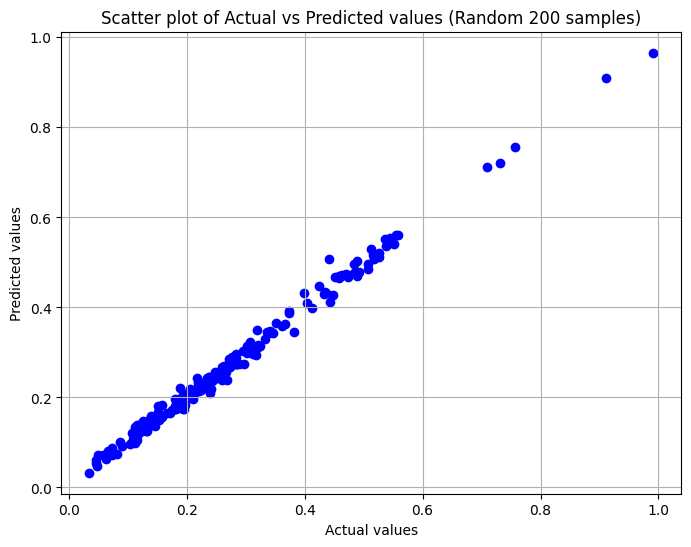

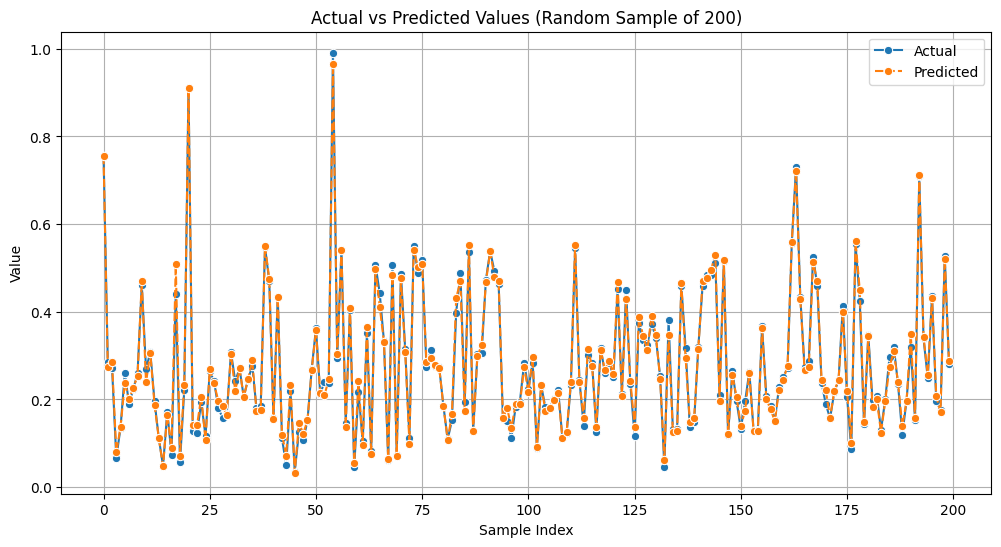

[0.12780808 0.16144327 0.16038078 ... 0.12043038 0.35217753 0.12266496] [0.13425404 0.15501398 0.1572609  ... 0.11909986 0.35257158 0.1398988 ]


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.metrics import r2_score

xgb_model = xgb.XGBRegressor()

xgb_model.fit(X_train, y_train)

y_val_pred = xgb_model.predict(X_val)

mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
print(f"Mean Squared Error on Validation Set: {mse}")
print(f'R-squared: {r2}')

if isinstance(y_val, pd.DataFrame):
    y_val = y_val.values.flatten()
if isinstance(y_val_pred, pd.DataFrame):
    y_val_pred = y_val_pred.values.flatten()


random_indices = random.sample(range(len(y_val)), 200)
y_val_sampled = y_val[random_indices]
y_val_pred_sampled = y_val_pred[random_indices]

results_df = pd.DataFrame({'Actual': y_val_sampled, 'Predicted': y_val_pred_sampled})




mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
y_val_flat = np.array(y_val).flatten()
y_pred_flat = np.array(y_val_pred).flatten()


map_ = np.mean(np.abs((y_val_flat - y_pred_flat) / y_val_flat)) * 100

print(f"MSE: {mse:.6f}")
print(f"MAE: {mae:.6f}")

print("Mean Absolute Percentage (MAP): {:.6f}%".format(map_))



plt.figure(figsize=(8, 6))
plt.scatter(y_val_sampled, y_val_pred_sampled, color='blue')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of Actual vs Predicted values (Random 200 samples)')
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df, marker='o')
plt.title('Actual vs Predicted Values (Random Sample of 200)')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()


print(y_val, y_val_pred)

<ipython-input-70-f34c4fd39f94>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


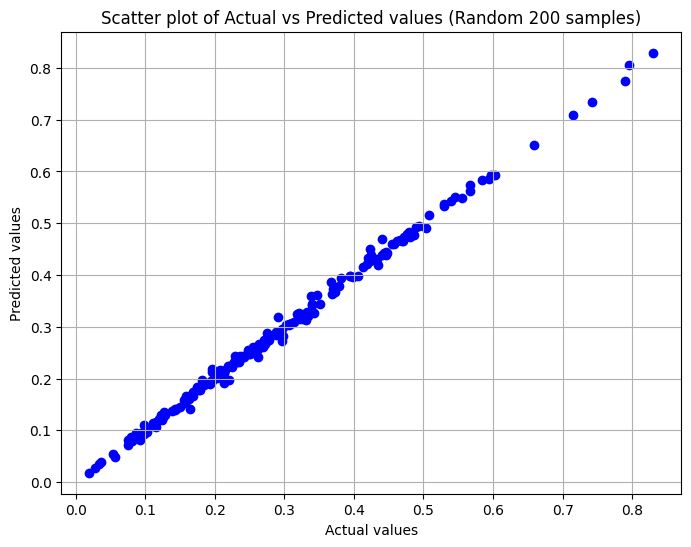

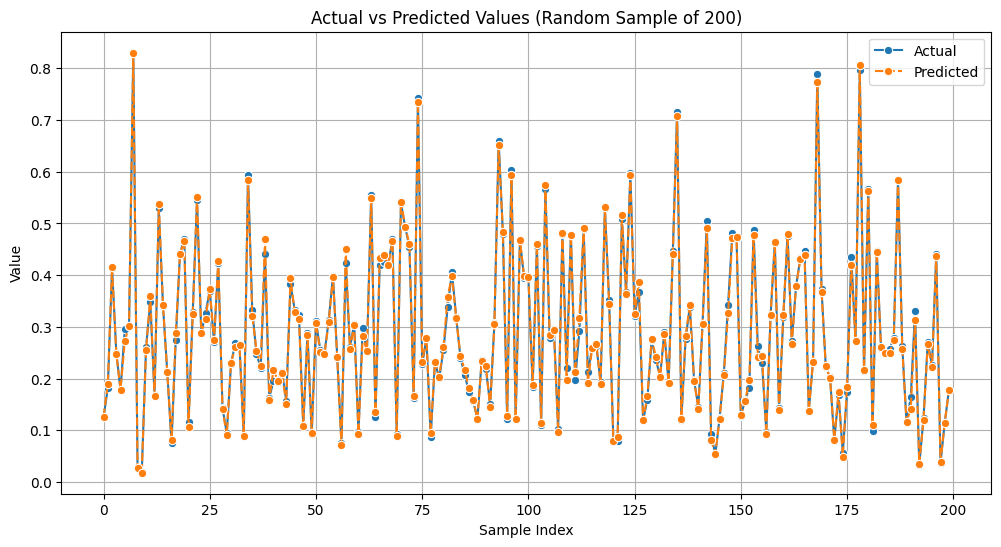

Mean Squared Error: 0.000119
Mean Absolute Error: 0.006957
Mean Absolute Percentage (MAP): 3.282381%


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_val)

random_indices = np.random.choice(len(y_val), size=200, replace=False)
y_val_sampled = y_val[random_indices]
y_pred_sampled = y_pred[random_indices]
results_df = pd.DataFrame({'Actual': y_val_sampled, 'Predicted': y_pred_sampled})

plt.figure(figsize=(8, 6))
plt.scatter(y_val_sampled, y_pred_sampled, color='blue', marker='o')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of Actual vs Predicted values (Random 200 samples)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df, marker='o')
plt.title('Actual vs Predicted Values (Random Sample of 200)')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()


mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)

y_val_flat = np.array(y_val).flatten()
y_pred_flat = np.array(y_pred).flatten()

map_ = np.mean(np.abs((y_val_flat - y_pred_flat) / y_val_flat)) * 100

print("Mean Squared Error: {:.6f}".format(mse))
print("Mean Absolute Error: {:.6f}".format(mae))
print("Mean Absolute Percentage (MAP): {:.6f}%".format(map_))

Epoch 1/50
574/574 [==============================] - 2s 3ms/step - loss: 0.0083 - mae: 0.0654 - val_loss: 0.0046 - val_mae: 0.0514
Epoch 2/50
574/574 [==============================] - 2s 3ms/step - loss: 0.0039 - mae: 0.0467 - val_loss: 0.0035 - val_mae: 0.0441
Epoch 3/50
574/574 [==============================] - 1s 2ms/step - loss: 0.0030 - mae: 0.0408 - val_loss: 0.0025 - val_mae: 0.0369
Epoch 4/50
574/574 [==============================] - 1s 2ms/step - loss: 0.0024 - mae: 0.0367 - val_loss: 0.0024 - val_mae: 0.0369
Epoch 5/50
574/574 [==============================] - 1s 2ms/step - loss: 0.0020 - mae: 0.0341 - val_loss: 0.0020 - val_mae: 0.0336
Epoch 6/50
574/574 [==============================] - 1s 2ms/step - loss: 0.0017 - mae: 0.0315 - val_loss: 0.0019 - val_mae: 0.0337
Epoch 7/50
574/574 [==============================] - 1s 2ms/step - loss: 0.0016 - mae: 0.0300 - val_loss: 0.0014 - val_mae: 0.0289
Epoch 8/50
574/574 [==============================] - 1s 2ms/step - loss: 0.

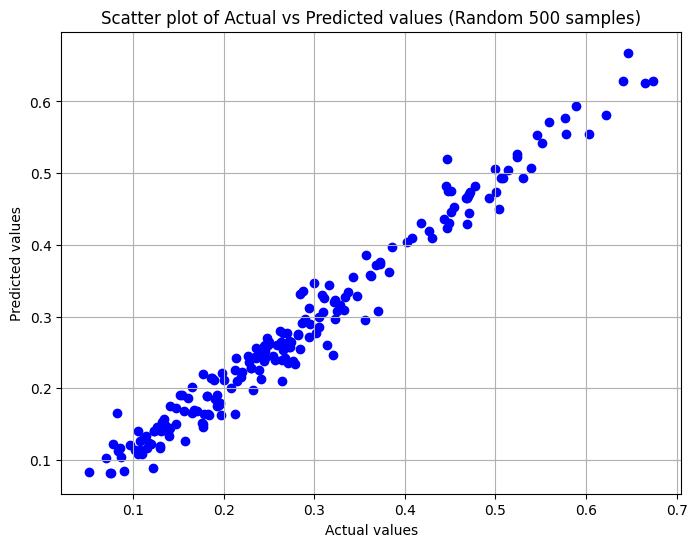

246/246 [==============================] - 0s 1ms/step - loss: 5.7433e-04 - mae: 0.0180
Mean Squared Error: 0.000574
Mean Absolute Error: 0.017973
Mean Absolute Percentage (MAP): 9.748939%


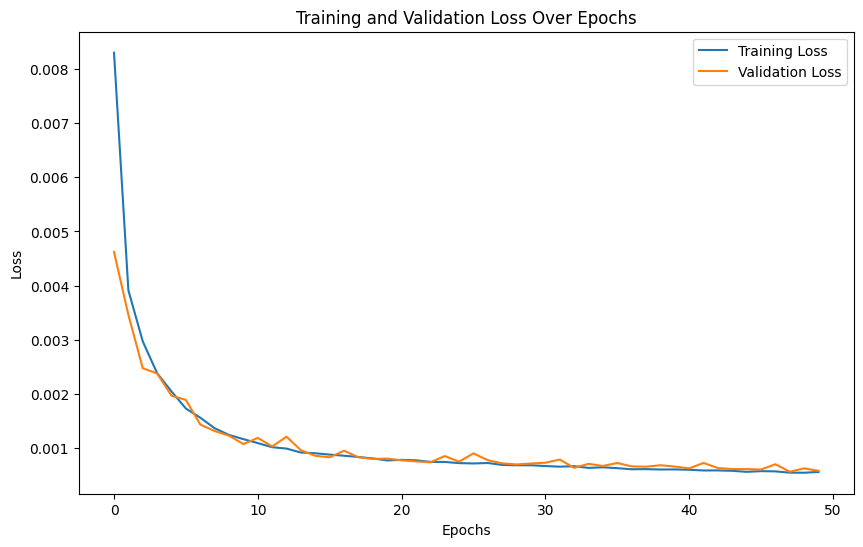

In [ ]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np




scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_val_scaled, y_val), batch_size=64)

y_pred = model.predict(X_val_scaled)


random_indices = np.random.choice(len(y_val), size=200, replace=False)
y_val_sampled = y_val[random_indices]
y_pred_sampled = y_pred[random_indices]


plt.figure(figsize=(8, 6))
plt.scatter(y_val_sampled, y_pred_sampled, color='blue', marker='o')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of Actual vs Predicted values (Random 500 samples)')
plt.grid(True)
plt.show()

mse, mae = model.evaluate(X_val_scaled, y_val)
print("Mean Squared Error: {:.6f}".format(mse))
print("Mean Absolute Error: {:.6f}".format(mae))


y_val_flat = np.array(y_val).flatten()
y_pred_flat = np.array(y_pred).flatten()


map_ = np.mean(np.abs((y_val_flat - y_pred_flat) / y_val_flat)) * 100

print("Mean Absolute Percentage (MAP): {:.6f}%".format(map_))

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<ipython-input-82-99f82092add0>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


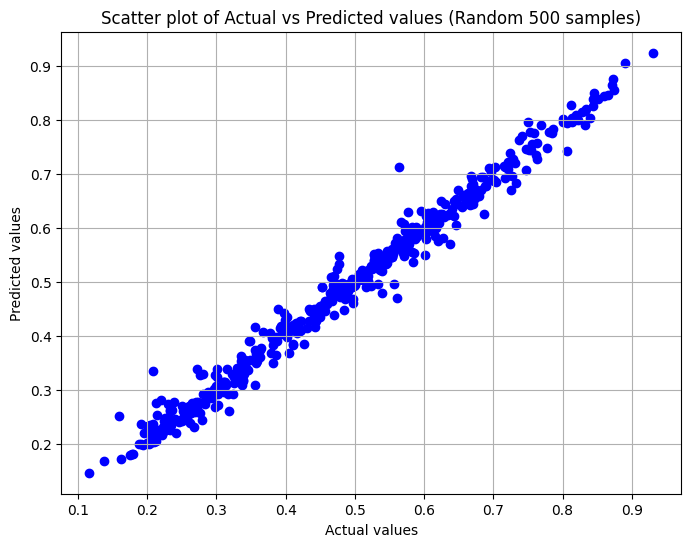

Mean Squared Error: 0.000469
Mean Absolute Error: 0.014027
Mean Absolute Percentage (MAP): 3.455597%


In [ ]:
#Champ
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

random_indices = np.random.choice(len(y_test), size=500, replace=False)
y_test_sampled = y_test.iloc[random_indices]
y_pred_sampled = y_pred[random_indices]

plt.figure(figsize=(8, 6))
plt.scatter(y_test_sampled, y_pred_sampled, color='blue', marker='o')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of Actual vs Predicted values (Random 500 samples)')
plt.grid(True)
plt.show()



mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

y_test_flat = np.array(y_test).flatten()
y_pred_flat = np.array(y_pred).flatten()

map_ = np.mean(np.abs((y_test_flat - y_pred_flat) / y_test_flat)) * 100

print("Mean Squared Error: {:.6f}".format(mse))
print("Mean Absolute Error: {:.6f}".format(mae))
print("Mean Absolute Percentage (MAP): {:.6f}%".format(map_))